# Intuition for Regularization

Okay, so you understand regression like a champion, but something tells you that these models are not a cure-all that explain all data. Big data sets are notorious for growing complex and creating extreme explanations for the data they describe. Even if these extreme explantions fit the data better than a simpler model, they are less likely to be  generalized. These models explain data from the past well, but are less likely to explain for future data it has never seen before. This issue, as you probably heard, is called an overfit model.

Take this trivial example: 

<table border="1" class="dataframe">   <thead>     <tr style="text-align: right;">       <th></th>       <th>animal</th>       <th>size</th>       <th>label</th>     </tr>   </thead>   <tbody>     <tr>       <th>Bo</th>       <td>snake</td>       <td>small</td>       <td>friendly</td>     </tr>     <tr>       <th>Spot</th>       <td>dog</td>       <td>small</td>       <td>friendly</td>     </tr>     <tr>       <th>Mo</th>       <td>cat</td>       <td>small</td>       <td>enemy</td>     </tr>     <tr>       <th>Lefty</th>       <td>cat</td>       <td>small</td>       <td>friendly</td>     </tr>     <tr>       <th>Curly</th>       <td>dog</td>       <td>large</td>       <td>friendly</td>     </tr>     <tr>       <th>Tom</th>       <td>snail</td>       <td>small</td>       <td>friendly</td>     </tr>     <tr>       <th>Jerry</th>       <td>dog</td>       <td>large</td>       <td>enemy</td>     </tr>     <tr>       <th>Sylvester</th>       <td>cat</td>       <td>large</td>       <td>enemy</td>     </tr>   </tbody> </table>

Our model builds the rule:

    "pets with up to four-letter names are enemies, as are large dogs with names beginning with 'J', except that small snakes are not enemies"

The model is dumb. Yes, it fits perfectly, but its clunky. Intuitively, we know this will not generalize out to all the pets in the real world. There must be a simpler rule. Consider this:

    "large dogs and cats are enemies"

It does not fit the data perfectly, but fits reasonably well. It's simpler, and we may suppose that this rule will better hold true to thousands more examples.

Regularization prevents this overfitting. Loosely, regularization is a technique to discourage complexity and increase  generalization, and it sometimes comes at the cost of model accuracy. 

"Okay", you say. I'm ready for level 2.

### Underfitting 
First - a quick note on underfitting. This is the condition where our model is not able to find any relationship between inputs and outputs. Our model cannot find any corelation between a pet's characteristics and friendliness. Underfitting is intuitive to catch, just look at the classification accuracy on the training data. If the accuracy is low, the model may be too simple, and therefore underfit. Increase the complexity (the number of paramters in the model), and get a better fit. As we will see, regularization also helps alleviate this problem. 

### Overfitting 
On the other end of the spectrum, overfitting is more difficult to detect. You must monitor when your model is performing _too_ well on training data, and poorly on testing data. 

Regularization will help the model find a happy medium between these two states, and minimize the overall prediction error. It tweaks the model to avoid being too simple, avoid being too complex, and find something juuuuust right. 

<img src="https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/bias_variance_tradeoff_e.jpg">
<center>
    ** Figure 1 **
</center>

### Regularization 

So how do we implement regularization? It is acheived by penalzing the weights in our model. Let's take a high level look at our model: 

<img src="https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/model_matrix.png" width='600'>
<center>
    ** Figure 2 **
</center>

In this infographic, there are four parameters to our model: 

    1) x: The input data with i (height) data points and j (width) features
    2) y: The labels 
    3) ŷ: The predictions (what our model outputs)
    4) W: The weights of the "j" coefficents

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/prediction_eq.png'>



In mathematical terms, our prediction, ŷ, equals the weighted sum of the data points. 

### Penalizing Weights

Regularization penalizes the weights, W, of our model, above. How does this help? In Figure 1 we learned that after a point, increasing model complexity is bad for the prediction accuracy. The model complexity prevents generalization by contouring to very small deviations in the data. 

Another way to think of it is that smaller coefficients are considered less complex because they say less about the world - they make weaker statements. Think about how the two statements on animal friendliness differ. "Complexity" may not be the ideal term; its a shame statistics don't take courses in etymology.

The key point is that **the size of the coeffient weights, W, increases with model complexity**. The magnitude of the coefficient represents the emphasis we are putting on that feature as a predictor. If we think animal size is important to friendliness, we will give that feature a large weight.  



Penalizing the weights constrains them, and helps generalize the predictions our model makes. 

# L2 Ridge Regression

Ridge Regresssion is the most common type of regularization penalty. It is calculated as the sum of the squares of the weights. Here we see the equation for the L2 penalty. Later I will cover how to implement it into the model. 

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/l2_eq.png'>

we can gain an intuition of it in python: 

In [ ]:
penalty = 0 #initialzie to zero, R(W) in the equation above
W = np.zeros(shape=(10,10)) #fake weights matrix

for i in np.arange(0, W.shape[0]):
    for j in np.arange(0, W.shape[1]):
        penalty += (W[i][j]**2)#square the weights and add 

Here, we are looping over the entire weights matrix and summing the squares of the weights. We can do this more efficiently with linear algebra, but this is just for demonstration. As an exponential function, you can see that L2 will penalize large weights from our W matrix, and prefer smaller ones. This will seek out W values that represent all features of the data. 

We should note that L2 is primarily used to prevent overfitting. The result keeps all the features in the model, but may reduce their weight. This is not true of all types of regulariztion. 

# L1 Lasso Regression

L1 takes the absolute value rather than the square:

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/l1_eq.png'>

L1 regularization shrinks coefficients, like L2, but it may also reduce some coefficents to zero, which is unique. A coeficent of zero essentially means that feature has been removed from the model. This is useful in senarios where we have hundres or thousands of features, like image classification, but may be excessive for smaller needs. 

we can gain an intuition of L1 in python: 

In [ ]:
penalty = 0 #initialzie to zero, R(W) in the equation above
W = np.zeros(shape=(10,10)) #fake weights matrix

for i in np.arange(0, W.shape[0]):
    for j in np.arange(0, W.shape[1]):
        penalty += (abs(W[i][j]))#absolute value the weights and add 

There are a few other types of regularization (Elastic Net, Dropout) used for other models. The key takeway is that we have calculated an R(W) penalty term. 

# Loss Function

We must now add this term to our loss function (also called cost function or objective function). The loss function maps our model performance to some "real-world" interpretation, where we can measure its error as a "cost". Our goal is to minimize that cost; minimize the error.  Quantitatively, the loss function answers the following: 

    "The real label was 1, but I predicted 0. Is that bad?" 
    "Yeah. That's bad. 500 bad, to be specific."

Or "X bad", where X is the measure of the cost. Mathematically, this is the most basic form of the loss function: 

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/loss_func.png' width='150'>

To implement regularization, we multiply our penalty term, R(W), by a coefficent λ, and add that  to the loss function. 

<img src='https://raw.githubusercontent.com/momonala/DS_tutorials/master/files/loss_func_add_reg.png' width='220'>

λ is a hyperparamter, which means that it is a variable that _**we**_ set, unlike the weights, W, or predictions ŷ. We can also tune λ like a radio dial, and set it to value that gives us the best results. If cleaning up data is the thing you do most in data science, then tuning hyperparameters is the thing you do second most. 

And that's it! We update weights in the loss function, to minimize our prediction error. In doing this, we have reduced the magnitude of the coefficeints, and therefore reduced the model complexity. The trick comes in idenifying when and how to implement regularization. 

# Python Implementation

Here I use the university admit dataset that determines if a student will get into grad school based on GPA, GRE, and the prestige of their undergrad almamater. I use sklearn's logisitc regression function to classify whether a student will get into the university, and try out the corresponding regularization types with the "penalty" argument. Note that the only two options here are L1 and L2 (no none option), and the default setting is L2. Though you can not "turn off" regularization with sklearn, you can just tune its stregth to be very low, as explained later. 

In [1]:
import pandas as pd 

data = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")
data.head(3)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1


In [2]:
#create dummy variables (categorical) for logistic regression 
#add to original dataframe 
dummy_ranks = pd.get_dummies(data['rank'], prefix='rank')
cols_to_keep = ['admit', 'gre', 'gpa']
df = data[cols_to_keep].join(dummy_ranks)
print "add dummies"
df.head(3)

add dummies


,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0


In [3]:
from sklearn import linear_model
from sklearn.model_selection import  train_test_split

#note that I remove prestige_1 to avoid the dummy variable trap
#one dummy must be treated as a baseline and removed since it will be collinear with the sum of the others 
X = df[df.columns[1:-1]] #select features 
Y = df['admit'] #select labels 
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,random_state=2) #create test and train sets 

### L1 ###
model_L1 = linear_model.LogisticRegression(penalty='l1')
model_L1.fit(train_X, train_Y)
    
print 'penalty: ', model_L1.penalty
print 'accuracy', model_L1.score(test_X, test_Y) #remember to score on testing set! 
print 'weights: ', model_L1.coef_
print 

### L2 ###
model_L2 = linear_model.LogisticRegression(penalty='l2')
model_L2.fit(train_X, train_Y)
    
print 'penalty: ', model_L2.penalty
print 'accuracy', model_L2.score(test_X, test_Y)
print 'weights: ', model_L2.coef_

penalty:  l1
accuracy 0.67
weights:  [[  1.01840370e-03   2.12057457e-01   1.10840207e+00   6.20089456e-01
    0.00000000e+00]]

penalty:  l2
accuracy 0.65
weights:  [[  5.36604799e-04   8.84567691e-02   1.01122051e+00   5.32212066e-01
   -1.55149010e-01]]


#### Tuning the Regularization Strength 
We can also change the regularization strength hyperparameter, λ. But of course, statisticians could not make it that easy. Sklearn replaces λ with the variable C, which is actually the inverese of the regularization strength. The way to interpret this is that C must be a postive float, and the regularization is strongest at values near 0, and weaker as you grow toward infiniti. Despite the underlying math, we tune C exactly as we would λ. 

In this example I loop over several different values of C and print out the accuracy results.

In [4]:
import numpy as np
# create array of magnitudes of 10^-4 to 10^4
strength = np.linspace(-3,3, 7)
strength = .1**strength

c = [] #log values
a = []
for reg_stregth in strength: #iterate over hyperparams 
    model = linear_model.LogisticRegression(penalty='l2', C=reg_stregth) #set C to value being iterated on 
    model.fit(train_X, train_Y)
    
    c.append(model.C) #log values
    a.append(model.score(test_X, test_Y))
    print 'regularization strength: ', model.C
    print 'accuracy', model.score(test_X, test_Y)

regularization strength:  1000.0
accuracy 0.69
regularization strength:  100.0
accuracy 0.69
regularization strength:  10.0
accuracy 0.69
regularization strength:  1.0
accuracy 0.65
regularization strength:  0.1
accuracy 0.63
regularization strength:  0.01
accuracy 0.63
regularization strength:  0.001
accuracy 0.63


It looks like, for this model, regularization was not needed. The weaker regularization strengths (larger values of C) seem to improve the model. We can clearly see the effect of the strength from values 0.1-10. 

Below is a way to visualize the accuracy changes as a function of regularization strength. 

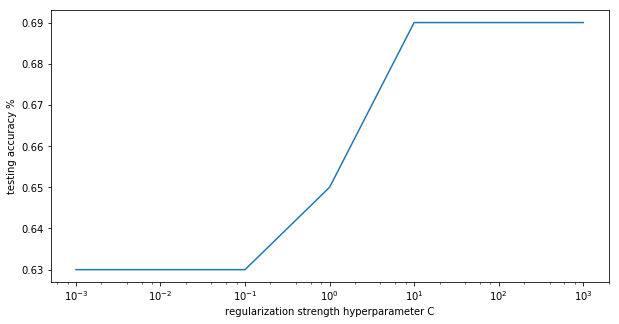

In [5]:
import matplotlib.pyplot as plt 
fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)
ax.plot(c,a)
ax.set_xscale('log')
plt.xlabel('regularization strength hyperparameter C')
plt.ylabel('testing accuracy %')
plt.show()

# Conclusion

Regularization is a technique to optimize model fit, most commonly to prevent overfitting. It works by penalizing the weights matrix, W, based on the size of your feature coefficients. Applying the penalty has the effect of generalizing the model to new data, but sometimes lowering the training accuracy. L2 regularization, or Ridge, is the most common for preventing overfitting. L1 regularization has the possibility to remove features from the data, and is better for extremely large datasets. Regularization comes with the need to tune the λ hyperparameter, which is the strength of the penalty. 

In practice, regularization has the following work flow:

    1) Determine if regularization should be applied. Is there a discrepancy in training and testing accuracy? 
    2) Which type to use? Is the model overfit? How big is the dataset? 
    3) Tune λ, the strength of the regularization to optimize testing accuracy. 

Sources: 

1) https://www.quora.com/What-is-regularization-in-machine-learning

2) http://www.pyimagesearch.com/2016/09/19/understanding-regularization-for-image-classification-and-machine-learning/

3) https://www.analyticsvidhya.com/blog/2016/01/complete-tutorial-ridge-lasso-regression-python/